In [1]:
import pandas as pd
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



In [2]:
train_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/train'
folders = ['neg', 'pos']

train_data = []
train_labels = []

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            train_data.append(text)
            train_labels.append(0 if folder == 'neg' else 1)

print(len(train_data), len(train_labels))


25000 25000


In [3]:
for i in range(5):
    print("Review:", i+1)
    print(train_data[i])
    print("Label:", train_labels[i])  # Print corresponding label (0 for neg, 1 for pos)
    print("-------------------")

Review: 1
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
Label: 0
-------------------
Review: 2
Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through

In [5]:
test_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/test'
folders = ['neg', 'pos']

test_data = []
test_labels = []

for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            test_data.append(text)
            test_labels.append(0 if folder == 'neg' else 1)

print(len(test_data), len(test_labels))

25000 25000


In [6]:
unsup_path = '/Users/marynydegger/Documents/FALL2023/STAT486/Research Project/train/unsup'

unsup_data = []

for filename in os.listdir(unsup_path):
    file_path = os.path.join(unsup_path, filename)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        unsup_data.append(text)

print(len(unsup_data))

50000


In [6]:
#Text Preprocessing 

vectorizer = TfidfVectorizer(max_features = 5000)  
X = vectorizer.fit_transform(train_data)
y = train_labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Testing and Evaluation 

X_test = vectorizer.transform(test_data)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

test_preds = nb_model.predict(X_test)

test_accuracy = accuracy_score(test_labels, test_preds)
print('Test Set Accuracy: ', test_accuracy)

Test Set Accuracy:  0.8406


In [8]:
# Text Cleaning and Tokenization 
# Lowercasing and removing punctuation

train_lower = [review.lower() for review in train_data]
train_cleaned = [review.translate(str.maketrans('', '', string.punctuation)) for review in train_lower]

tokenized_trained = [word_tokenize(review) for review in train_cleaned]

stop_words = set(stopwords.words('english'))

# Removes the common stopwords like 'a', 'about' 'are'
filtered_data = [[word for word in review if word not in stop_words] for review in tokenized_trained]

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

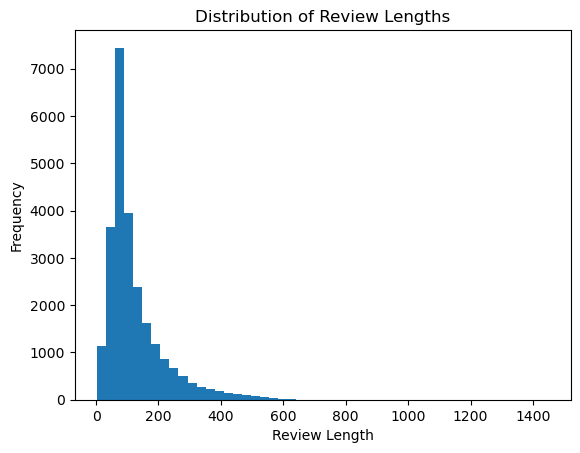

In [9]:
# Insights from initial EDA

review_lengths = [len(review) for review in filtered_data]
plt.hist(review_lengths, bins = 50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


In [10]:
# class distribution (Divided equally between positive and negatives)

pos_reviews = sum(label == 1 for label in train_labels)
neg_reviews = sum(label == 0 for label in train_labels)
print('Positive Reviews: ', pos_reviews)
print('Negative Reviews: ', neg_reviews)


Positive Reviews:  12500
Negative Reviews:  12500


In [11]:
# Feature Engineering 

bow_vectorizer = CountVectorizer(max_features = 5000)
bow_features = bow_vectorizer.fit_transform(train_data)

tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_features = tfidf_vectorizer.fit_transform(train_data)

print(tfidf_vectorizer)
print(tfidf_features)

TfidfVectorizer(max_features=5000)
  (0, 1809)	0.2154180451207366
  (0, 1948)	0.09210870815046932
  (0, 3118)	0.06907684364110198
  (0, 726)	0.14360608290300825
  (0, 4369)	0.22797392679128636
  (0, 4450)	0.08664999025268534
  (0, 233)	0.048772016621871
  (0, 3048)	0.2924129724625296
  (0, 4646)	0.1881709343134227
  (0, 1852)	0.08291109911696155
  (0, 4189)	0.27283452917182244
  (0, 576)	0.31527061005603163
  (0, 571)	0.1446463067366365
  (0, 360)	0.17122004800466642
  (0, 280)	0.27171939887106045
  (0, 4205)	0.12874991400841249
  (0, 4875)	0.2681138111368488
  (0, 4100)	0.27586362702665757
  (0, 2373)	0.05259220864003694
  (0, 428)	0.07404580181602996
  (0, 4516)	0.1504092750862989
  (0, 2734)	0.22885394886213406
  (0, 1727)	0.14941504488694773
  (0, 4464)	0.05184674741436131
  (0, 3933)	0.27858798501740445
  :	:
  (24999, 2230)	0.045807913925872905
  (24999, 2068)	0.038816068602694556
  (24999, 3851)	0.0814531140948919
  (24999, 3051)	0.03753132872100591
  (24999, 2059)	0.04731662799

In [12]:
# Training a Naive Bayes Classifier 

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

val_accuacy = nb_model.score(X_val, y_val)
print('Validation Set Accuracy (Naive Bayes): ', val_accuacy)

Validation Set Accuracy (Naive Bayes):  0.8502


In [13]:
# Additional Supervised ML Models 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC

In [14]:
logreg_model = LogisticRegression(max_iter = 1000)
logreg_model.fit(X_train, y_train)
logreg_accuracy = logreg_model.score(X_test, test_labels)
logreg_preds = logreg_model.predict(X_test)
logreg_precision = precision_score(test_labels, logreg_preds)
logreg_recall = recall_score(test_labels, logreg_preds)
logreg_auc = roc_auc_score(test_labels, logreg_preds)

print('Logistic Regression Testet Accuracy: ', logreg_accuracy)
print('Logistic Regression Precision: ', logreg_precision)
print('Logistic Regression Recall: ', logreg_recall)
print('Logistic Regression AUC: ', logreg_auc)


Logistic Regression Testet Accuracy:  0.87992
Logistic Regression Precision:  0.8781653129479217
Logistic Regression Recall:  0.88224
Logistic Regression AUC:  0.87992


In [16]:
# SVM
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, test_labels)
svm_preds = svm_model.predict(X_test)
svm_precision = precision_score(test_labels, svm_preds)
svm_recall = recall_score(test_labels, svm_preds)
svm_auc = roc_auc_score(test_labels, svm_preds)

print('SVM Test Set Accuracy: ', svm_accuracy)
print('SVM Precision: ', svm_precision)
print('SVM Recall: ', svm_recall)
print('SVM AUC: ', svm_auc)

SVM Test Set Accuracy:  0.87764
SVM Precision:  0.8772476624310717
SVM Recall:  0.87816
SVM AUC:  0.87764


In [18]:
# Advanced Supervised methods

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [25]:
import numpy as np

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model without toarray() conversion
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Evaluate on test set without toarray() conversion
loss, accuracy = model.evaluate(X_test, test_labels)
print('Neural Network Test Set Accuracy: ', accuracy)

Epoch 1/5
625/625 [==============================] - 3s 4ms/step - loss: 0.3791 - accuracy: 0.8449 - val_loss: 0.2759 - val_accuracy: 0.8878
Epoch 2/5
625/625 [==============================] - 2s 2ms/step - loss: 0.2253 - accuracy: 0.9133 - val_loss: 0.2733 - val_accuracy: 0.8878
Epoch 3/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1860 - accuracy: 0.9290 - val_loss: 0.2918 - val_accuracy: 0.8816
Epoch 4/5
625/625 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9408 - val_loss: 0.3026 - val_accuracy: 0.8790
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.3447 - accuracy: 0.8674
Neural Network Test Set Accuracy:  0.86735999584198


In [27]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Apply PCA for dimensionality reduction
pca = PCA(n_components=100)  # Set the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Use these reduced dimensions for modeling (e.g., with a classifier)
# Example: Logistic Regression with PCA-transformed data
pca_logreg_model = LogisticRegression(max_iter=1000)
pca_logreg_model.fit(X_train_pca, y_train)
pca_accuracy = pca_logreg_model.score(X_test_pca, test_labels)
print('PCA + Logistic Regression Test Set Accuracy: ', pca_accuracy)


PCA + Logistic Regression Test Set Accuracy:  0.84392


In [30]:
# Outlier Analysis (not learned in class) using Isolation Forest

from sklearn.ensemble import IsolationForest

In [33]:
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

outlier_preds = iso_forest.predict(X_train)

outliers_count = len(outlier_preds[outlier_preds == -1])
outlier_percentage = outliers_count / len(outlier_preds) * 100

print(f'Number of outliers detected: {outliers_count}')
print(f'Percentage of outliers: {outlier_percentage:.2f}%')

Number of outliers detected: 0
Percentage of outliers: 0.00%


In [7]:
# Random Forest Classifier 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(classification_report(test_labels, rf_preds))

NameError: name 'RandomForestClassifier' is not defined

In [34]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

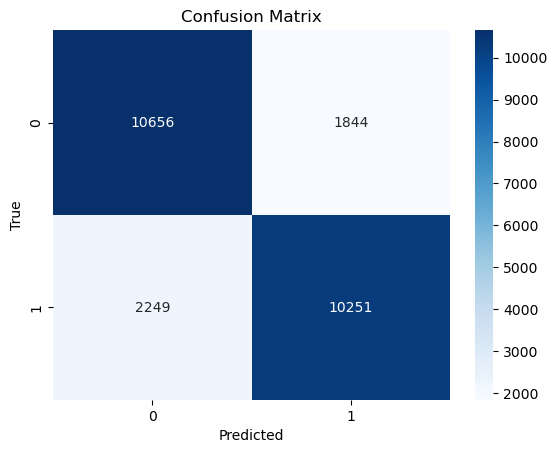

In [36]:
conf_matrix = confusion_matrix(test_labels, rf_preds)

sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve, roc_auc_score

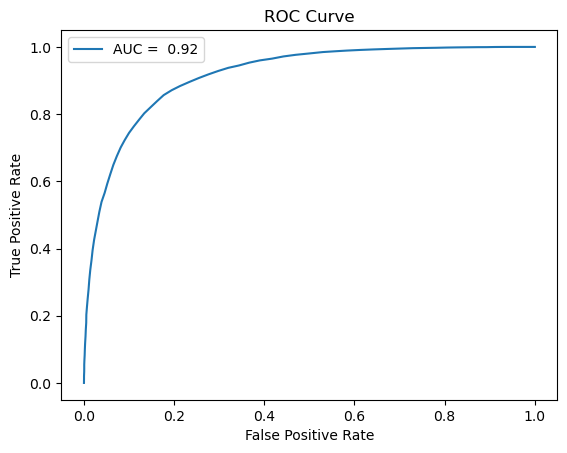

In [40]:
rf_probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(test_labels, rf_probs)
auc_score = roc_auc_score(test_labels, rf_probs)

plt.plot(fpr, tpr, label = f'AUC = {auc_score: .2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [43]:
# Feature importance for Tree based models 

feature_importances = rf_model.feature_importances_
num_features = X_train.shape[1]
feature_names = [f'Feature {i}' for i in range(num_features)]

plt.figure(figsize = (10, 6))
plt.barh(range(num_features), feature_importances, align = 'center')
plt.yticks(range(num_features), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()
